In [1]:
import pandas as pd
import numpy as np
from iSSVD.functions import issvd, gen_sim_vec 
from pandas import ExcelWriter
from numpy.random import seed

In [1]:
path = 'data/issvd_data.xlsx'

In [3]:
path[-1]=='x'

True

In [8]:

def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n, header=True, index= False)
    
def cluster_assignment(clust_membership, n_var):
    #eturn [pd.DataFrame([np.arange(n_var) in clust for clust in clust_membership])]
    return [[int(i in clust) for clust in clust_membership]  for i in np.arange(n_var)]

def fix_col_clusts(clust_membership, n_views, n_clust, n_var):
    #clust_membership[i][j] is the i^th cluster in the j^th row - so the i^th column in the j^th view
    new_clust = [[clust_membership[i][j] for i in np.arange(n_clust)] for j in np.arange(n_views)]
    #in new_clust - the length of the list is the n_views, 
    #item in zip(new_clust, n_var) is the set of e.g. 10 clusters for the ith view
    #and the number of variables we are clustering here
    return [pd.DataFrame(cluster_assignment(clust,n)) for (clust, n) in zip(new_clust, n_var)]

def fix_row_clusts(clust_membership, n_views, n_samp):
    new_clust = [cluster_assignment(clust_membership, n_samp) for i in np.arange(n_views)]
    return [pd.DataFrame(results) for results in new_clust]    

In [80]:
data_views = pd.ExcelFile("test_data2/data.xlsx")
data = [np.array(pd.read_excel(data_views, sheet)) for sheet in data_views.sheet_names]

In [74]:
data_views = pd.ExcelFile("test_data/data.xlsx")
data = [np.array(pd.read_excel(data_views, sheet)) for sheet in data_views.sheet_names]

In [89]:
iSSVD_applied = issvd(data,standr=False,pointwise=True,steps=100,size=0.5,vthr=0.7,
            ssthr=[0.6,0.65],nbicluster=10,rows_nc=True,cols_nc=True,col_overlap=True,
            row_overlap=True,pceru=0.95,pcerv=0.95,merr=0.0001,iters=100)

Rows not stable!
Integrative biclusters detected: 0



In [77]:
iSSVD_applied = issvd(data,standr=False,pointwise=True,steps=100,size=0.5,vthr=0.7,
            ssthr=[0.6,0.65],nbicluster=4,rows_nc=True,cols_nc=True,col_overlap=True
            ,row_overlap=True,pceru=0.1,pcerv=0.1,merr=0.0001,iters=100)

Bicluster 1...


Bicluster 2...


Bicluster 3...


Bicluster 4...


Integrative biclusters detected: 4



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [96]:
iSSVD_applied = issvd(data,standr=False,pointwise=True,steps=100,size=0.5,
            vthr = 0.7,ssthr=[0.6,0.65],nbicluster=10,rows_nc=True,cols_nc=True,col_overlap=True
            ,row_overlap=True,pceru=0.1,pcerv=0.1,merr=0.0001,iters=100)

Rows not stable!
Integrative biclusters detected: 0



In [78]:
n_views = len(data)
n_vars = [view.shape[1] for view in data]
n_samps = data[0].shape[0]
n_clusts = iSSVD_applied['N']

row_clusts = fix_row_clusts(iSSVD_applied['Sample_index'], n_views, n_samps)
col_clusts = fix_col_clusts(iSSVD_applied['Variable_index'], n_views, n_clusts, n_vars)

In [79]:
# [len(iSSVD_applied['Variable_index'][i][1]) for i in range(4)]
# [len(iSSVD_applied['Sample_index'][i]) for i in range(4)]
save_xls(row_clusts, "test_data/issvd_rows.xlsx")
save_xls(col_clusts, "test_data/issvd_cols.xlsx")


/var/folders/yf/mqv7gzh91n9d4qpvwbdrx4600000gn/T/ipykernel_1140/1040774581.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  df.to_excel(writer,'sheet%s' % n, header=True, index= False)


In [19]:
iSSVD_applied['Sample_index'][1]

array([ 0,  2,  4, 11, 19, 25, 38, 60, 75, 95, 99])

In [14]:
iSSVD_applied['Variable_index'][1][1]

array([  0,   3,   6,  24,  29,  33,  34,  38,  43,  47,  49,  55,  57,
        85, 111, 113, 132, 146, 154, 157, 158, 161, 163, 164, 175, 177,
       179, 193, 229, 230, 233, 248, 282, 289, 305, 320, 332, 352, 359,
       376, 394, 395, 417, 421, 423, 427, 445, 446, 460, 497, 504, 516,
       518, 519, 524, 531, 544, 555, 576, 584, 595, 604, 614, 620, 622,
       632, 637, 641, 655, 660, 672, 691, 708, 712, 718, 721, 730, 735,
       738, 746, 750, 755, 758, 765, 771, 787, 812, 815, 870, 876, 880,
       885, 896, 900, 905, 907, 914, 920, 961, 964, 966, 996])

In [129]:
iSSVD_applied['Variable_index'][0][1],iSSVD_applied['Variable_index'][3][1]

(array([ 0,  4,  6, 10, 11, 12, 13, 14, 17, 18, 19, 22, 23, 24, 25, 28, 30,
        32, 33, 35, 36, 38, 40, 41, 44, 45, 48, 49]),
 array([ 1,  2,  3,  5,  7,  8,  9, 15, 16, 20, 21, 26, 27, 29, 31, 34, 37,
        39, 42, 43, 46, 47]))

In [36]:
seed(20)
data, rows, cols = gen_sim_vec(n=200,p=1000,D=2,rowsize=50, colsize=100, 
                               numbers=1,sigma=0.1,nbicluster=4, orthonm=False)

df = data[0]

In [39]:
iSSVD_applied = issvd(df,standr=False,pointwise=True,steps=100,size=0.5,vthr=0.7,
            ssthr=[0.6,0.8],nbicluster=4,rows_nc=True,cols_nc=True,col_overlap=False
            ,row_overlap=False,pceru=0.1,pcerv=0.1,merr=0.0001,iters=100)

Rows not stable!
Integrative biclusters detected: 0



In [45]:
issvd_gen = issvd(X=df,standr=False,pointwise=True,steps=100,size=0.5,
            vthr = 0.9,ssthr=[0.6,0.65],nbicluster=10,rows_nc=False,cols_nc=False,col_overlap=False
            ,row_overlap=False,pceru=0.1,pcerv=0.1,merr=0.0001,iters=100)

Bicluster 1...


Bicluster 2...


Bicluster 3...


Bicluster 4...


All samples are clustered!
Integrative biclusters detected: 4



In [49]:
from iSSVD.functions import gen_tmp, issvd_diagnostics

In [50]:
rev, rel, f, fp, fn = issvd_diagnostics(res1tmp,res2tmp,row_ind,col_ind)

In [51]:
rev, rel, f, fp, fn

(0.9319693940515413, 0.9319693940515413, 0.9319693940515413, 0.065, 0.00875)

In [48]:
# Bicluster samples identified by iSSVD
Rows = issvd_gen['Sample_index']
# Bicluster variables identified by iSSVD
Cols = issvd_gen['Variable_index']

# True bicluster samples and variables
row_ind = rows[0]
col_ind = cols[0]

res1tmp, res2tmp = gen_tmp(Rows,Cols, row_ind, col_ind,n=200,p=1000,D=2)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

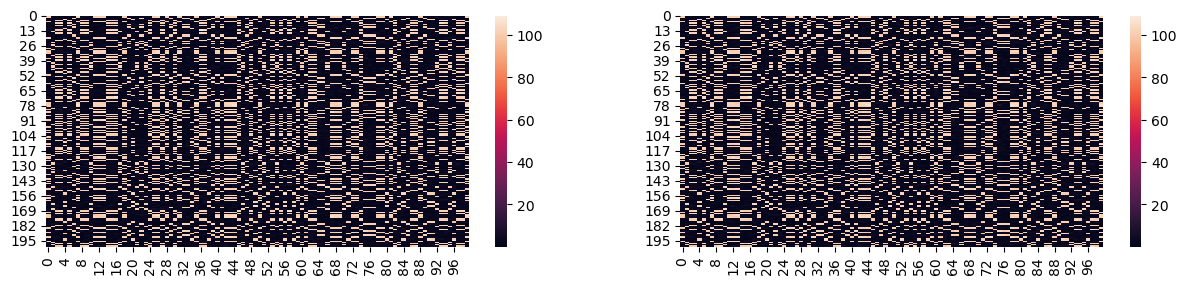

In [110]:
# Before clustered
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

sns.heatmap(data[0],ax=axes[0])
sns.heatmap(data[0],ax=axes[1])